# 1. Подготовка данных

In [1]:
#импорт необходимых библиотек
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState
import matplotlib.pyplot as plt
from scipy.stats import skewnorm
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer

In [2]:
#выгрузка данных
data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full.csv')



In [3]:
#удаляем пустые значение в нужных столбцах для подсчета кф
data_train_drop = data_train.dropna(subset = ['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au', 'rougher.output.recovery'], inplace = False)



In [4]:
#нахождение переменных для проверки кф эффективности
C = data_train_drop['rougher.output.concentrate_au']
F = data_train_drop['rougher.input.feed_au']
T = data_train_drop['rougher.output.tail_au']

In [5]:
#добавление столбца с кф после подсчета 
data_train_drop['rougher.output.recovery_check'] = ((C * (F - T)) / (F * (C - T))) * 100                                                                                            
                                                                                           

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
#кф МАЕ
MAE_recovery = mean_absolute_error(data_train_drop['rougher.output.recovery'], data_train_drop['rougher.output.recovery_check'])
print(MAE_recovery)

9.444891926100695e-15


In [7]:
#тестовая выборка и обучающие выборки
data_test.info()
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [8]:
#минимальное значение в данных по дате
display(data_test.sort_values(by = 'date', ascending = False).tail(5))
display(data_train.sort_values(by = 'date', ascending = False).tail(5))

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980


In [9]:
#максимальное значение в данных по дате
display(data_test.sort_values(by = 'date', ascending = False).head(5))
display(data_train.sort_values(by = 'date', ascending = False).head(5))

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
5855,2017-12-31 23:59:59,181.556856,14.995850,8.07,1.623454,1498.096303,-499.796922,1501.743791,-505.146931,1499.535978,...,20.034715,-500.728588,14.914199,-499.948518,10.986607,-500.658027,8.989497,-500.337588,8.988632,-500.764937
5854,2017-12-31 22:59:59,179.697158,15.438979,8.07,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284
5853,2017-12-31 21:59:59,171.135718,15.993669,8.07,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5852,2017-12-31 20:59:59,172.910270,16.002605,8.07,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5851,2017-12-31 19:59:59,173.957757,15.963399,8.07,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
16859,2018-08-18 10:59:59,3.598375,11.737832,6.717509,46.299438,70.281454,8.406690,2.517518,10.652193,1.389434,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428


In [10]:
#удаляем пропуски в таргетах (финальных данных)
data_train = data_train.dropna(subset = ['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au'], inplace = False)

In [11]:
#добавляю в тестовую выборку столбцов, которые там отсутсвуют
data_test = data_test.merge(data_full[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date')


In [12]:
#разделение столбца даты на два столбца: год и месяц (валидационная выборка)
data_train['month'] = pd.DatetimeIndex(data_train['date']).month
data_train['year'] = pd.DatetimeIndex(data_train['date']).year

#разделение столбца даты на два столбца: год и месяц (тестовая выборка)
data_test['month'] = pd.DatetimeIndex(data_test['date']).month
data_test['year'] = pd.DatetimeIndex(data_test['date']).year


In [13]:
#соединяю в отдельный индекс год и месяц (валидационная выборка)
data_train['Y0M'] = data_train[['year','month']].dot([100,1])

#соединяю в отдельный индекс год и месяц (тестовая выборка)
data_test['Y0M'] = data_test[['year','month']].dot([100,1])


In [14]:
#заполняем пропуски (валидационная выборка)
unique_Y0M = data_train['Y0M'].unique().tolist()

name_columns_train = data_train.columns
name_columns_train = name_columns_train.drop(name_columns_train[0])

for element in name_columns_train:
    for type in unique_Y0M:
        avg = data_train[(data_train["Y0M"] == type)][element].mean()
        data_train.loc[(data_train["Y0M"] == type) & (data_train[element]).isna(), element] = avg

In [15]:
#заполняем пропуски (тестовая выборка)
unique_Y0M = data_test['Y0M'].unique().tolist()

name_columns_test = data_test.columns
name_columns_test = name_columns_test.drop(name_columns_test[0])

for element in name_columns_test:
    for type in unique_Y0M:
        avg = data_test[(data_test["Y0M"] == type)][element].mean()
        data_test.loc[(data_test["Y0M"] == type) & (data_test[element]).isna(), element] = avg

In [16]:
#проверка по заполнению
data_train.info()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14934 entries, 0 to 16859
Data columns (total 90 columns):
date                                                  14934 non-null object
final.output.concentrate_ag                           14934 non-null float64
final.output.concentrate_pb                           14934 non-null float64
final.output.concentrate_sol                          14934 non-null float64
final.output.concentrate_au                           14934 non-null float64
final.output.recovery                                 14934 non-null float64
final.output.tail_ag                                  14934 non-null float64
final.output.tail_pb                                  14934 non-null float64
final.output.tail_sol                                 14934 non-null float64
final.output.tail_au                                  14934 non-null float64
primary_cleaner.input.sulfate                         14934 non-null float64
primary_cleaner.input.depressant             

In [17]:
#удаляем ненужные столбцы
data_train = data_train.drop(['date', 'month', 'year', 'Y0M'], axis = 1)
data_train.info()

data_test = data_test.drop(['month', 'year', 'Y0M'], axis = 1)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14934 entries, 0 to 16859
Data columns (total 86 columns):
final.output.concentrate_ag                           14934 non-null float64
final.output.concentrate_pb                           14934 non-null float64
final.output.concentrate_sol                          14934 non-null float64
final.output.concentrate_au                           14934 non-null float64
final.output.recovery                                 14934 non-null float64
final.output.tail_ag                                  14934 non-null float64
final.output.tail_pb                                  14934 non-null float64
final.output.tail_sol                                 14934 non-null float64
final.output.tail_au                                  14934 non-null float64
primary_cleaner.input.sulfate                         14934 non-null float64
primary_cleaner.input.depressant                      14934 non-null float64
primary_cleaner.input.feed_size             

# Шаг 1. Выводы   
1) Нашел значение МАЕ - "9.444891926100695e-15" (анализировал записанные данные в таблице и полученные по формуле), из этого можно сказать, что значение столбца "rougher.output.recovery" схожи со значениями полученными при подсчете кф эффективности по формуле: ((C * (F - T)) / (F * (C - T))) * 100    
2) Различия данных в тестовой и обучающей выборке в следующем:   
а) в тестовой выборке не отображены финальные значение по после прохождения всех технологических процессов,   
б) в тестовой выборке присутствуют только параметры сырья и параметры, характеризирующие текущее состояние процесса (то есть значения, которые мы имеем по умолчанию - данные с подсчетами отсутсвуют).  
в) тестовая выборка показывает данные в диапазоне: с 01.09.16 до 01.01.18, обучающая выборка: с 01.15.16 до 18.08.18    
3) По условию задачи "Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи." в связи это группирую данные по году и месяцу - нахожу среднее. Средним значением и заполняю пропуски.   
4) В таргетах удалил пропуски.    
5) После заполнения пропусков удалил лишние столбцы, которые создавал для задачи заполнения + удалил столбец "date" так как он уже не пригодится.   


# 2. Анализ данных

Кф концентрации серебра -  Начальная стадия : 8.485960133707735
Кф концентрации серебра -  После флотации : 11.383626951128468
Кф концентрации серебра -  После первичной обработка : 8.044207889174697
Кф концентрации серебра -  Финальные хар-ки : 5.042639433943557


Text(0.5, 1.0, 'Кф концентрации серебра на всех стадиях (среднее)')

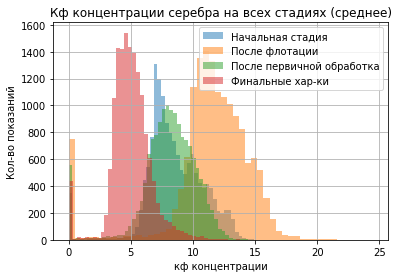

In [18]:
#концентрация серебра на различных стадиях
con_met = ['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']
name_st = ['Начальная стадия', 'После флотации', 'После первичной обработка', 'Финальные хар-ки']

for i, k in zip(con_met, name_st):
    print('Кф концентрации серебра - ', k, ':', data_train[i].mean())
    data_train[i].hist(bins=50, alpha=0.5, label=[k])

plt.legend()
plt.xlabel('кф концентрации')
plt.ylabel('Кол-во показаний')
plt.title('Кф концентрации серебра на всех стадиях (среднее)')

Кф концентрации свинца -  Начальная стадия : 3.5049542240921654
Кф концентрации свинца -  После флотации : 7.432350428209004
Кф концентрации свинца -  После первичной обработка : 9.366967753551226
Кф концентрации свинца -  Финальные хар-ки : 9.889007352402464


Text(0.5, 1.0, 'Кф концентрации свинца на всех стадиях (среднее)')

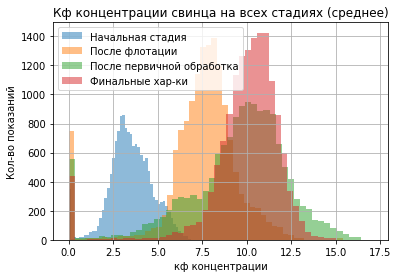

In [19]:
#концентрация свинца на различных стадиях
con_met = ['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']

for i, k in zip(con_met, name_st):
    print('Кф концентрации свинца - ', k, ':', data_train[i].mean())
    data_train[i].hist(bins=50, alpha=0.5, label=[k])

plt.legend()
plt.xlabel('кф концентрации')
plt.ylabel('Кол-во показаний')
plt.title('Кф концентрации свинца на всех стадиях (среднее)')
                        

Кф концентрации золота -  Начальная стадия : 7.832675092464179
Кф концентрации золота -  После флотации : 18.79803818496596
Кф концентрации золота -  После первичной обработка : 31.456803428073055
Кф концентрации золота -  Финальные хар-ки : 42.7309209973254


Text(0.5, 1.0, 'Кф концентрации золота на всех стадиях (среднее)')

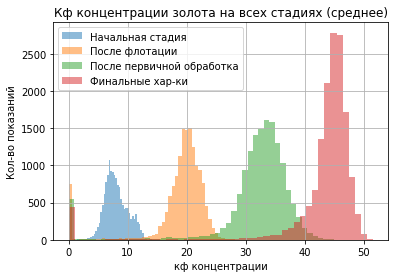

In [20]:
#концентрация золота на различных стадиях
con_met = ['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']

for i, k in zip(con_met, name_st):
    print('Кф концентрации золота - ', k, ':', data_train[i].mean())
    data_train[i].hist(bins=50, alpha=0.5, label=[k])

plt.legend()
plt.xlabel('кф концентрации')
plt.ylabel('Кол-во показаний')
plt.title('Кф концентрации золота на всех стадиях (среднее)')


Срез данных по столбцу "Размер гранул сырья"_обучающая выборка:
count    14934.000000
mean        59.566959
std         22.680309
min          9.659576
25%         48.348583
50%         54.873153
75%         65.677316
max        484.967466
Name: rougher.input.feed_size, dtype: float64
Срез данных по столбцу "Размер гранул сырья"_тестовая выборка:
count    5856.000000
mean       55.923637
std        22.689796
min         0.046369
25%        43.898467
50%        49.990064
75%        61.645317
max       477.445473
Name: rougher.input.feed_size, dtype: float64


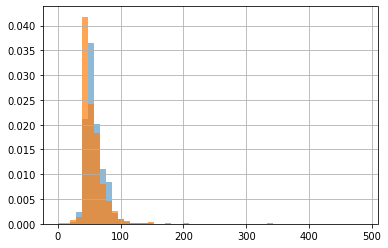

In [21]:
#Срез данных по столбцу "Размер гранул сырья"
print('Срез данных по столбцу "Размер гранул сырья"_обучающая выборка:')
print(data_train['rougher.input.feed_size'].describe())
print('Срез данных по столбцу "Размер гранул сырья"_тестовая выборка:')
print(data_test['rougher.input.feed_size'].describe())


#распределение гранул сырья
data_train['rougher.input.feed_size'].hist(bins = 50, alpha=0.5, density=True)
data_test['rougher.input.feed_size'].hist(bins = 50, alpha=0.7, density=True)

296045.4848502438


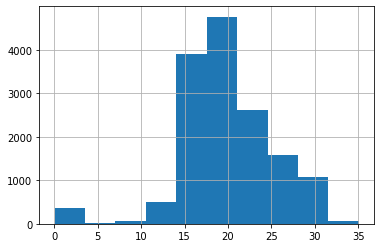

In [22]:
#суммарная концетрация всех веществ в сырье_обучающая выборка
data_train['feed_sum'] = data_train['rougher.input.feed_ag'] + data_train['rougher.input.feed_pb'] + data_train['rougher.input.feed_au']                             
print(data_train['feed_sum'].sum())
data_train['feed_sum'].hist()


Суммарная концентрация всех вещест после флотации: 561727.7084373075
Кол-во наблюдений: 14934


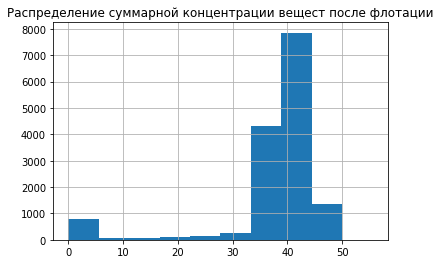

Кол-во наблюдений (после очистки аномалий): 559


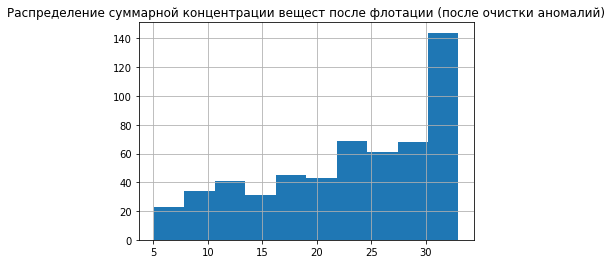

In [23]:
#суммарная концетрация всех веществ после флотации_обучающая выборка
data_train['rougher_sum'] = data_train['rougher.output.concentrate_ag'] + data_train['rougher.output.concentrate_pb'] + data_train['rougher.output.concentrate_au']                           
print('Суммарная концентрация всех вещест после флотации:', data_train['rougher_sum'].sum())
print('Кол-во наблюдений:', data_train['rougher_sum'].count())
data_train['rougher_sum'].hist()
plt.title('Распределение суммарной концентрации вещест после флотации')
plt.show()


a = data_train.query('5 < rougher_sum < 33')
print('Кол-во наблюдений (после очистки аномалий):', a['rougher_sum'].count())
a['rougher_sum'].hist()
plt.title('Распределение суммарной концентрации вещест после флотации (после очистки аномалий)')
plt.show()


Суммарная концентрация всех вещест после всех стадий: 861132.787281349
Кол-во наблюдений: 14934


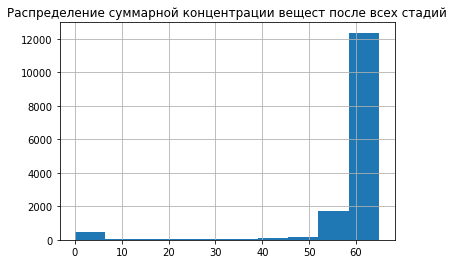

Кол-во наблюдений (после очистки аномалий): 350


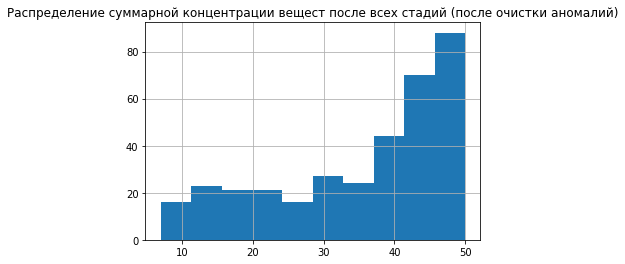

In [24]:
#суммарная концетрация всех веществ после всех стадий_обучающая выборка
data_train['final_sum'] = data_train['final.output.concentrate_ag'] + data_train['final.output.concentrate_pb'] + data_train['final.output.concentrate_au']                             
print('Суммарная концентрация всех вещест после всех стадий:', data_train['final_sum'].sum())
print('Кол-во наблюдений:', data_train['final_sum'].count())
data_train['final_sum'].hist()
plt.title('Распределение суммарной концентрации вещест после всех стадий')
plt.show()

b = data_train.query('5 < final_sum < 50')
print('Кол-во наблюдений (после очистки аномалий):', b['final_sum'].count())
b['final_sum'].hist()
plt.title('Распределение суммарной концентрации вещест после всех стадий (после очистки аномалий)')
plt.show()

# Шаг 2. Выводы.  
1) Концентрация доп. металлов в руде, варьерутеся от стадии к стадии - на начальной стадии концентрация серебра в руде больше, чем свинца. Но в финальных характеристиках концентрация свинца становиться больше, чем у серебра.    
Что касается концентрации золота - то с каждой стадией она только увеличивается.     
2) При сравнении размера гранул сырья после изучения среза данных по процентилям и средним - выявилось, отличия небольшие. Изучения распределения показало, что пиковые значения присутвуют: тестовая выборка - значение 49 болеее 2к показателей, обучающая выборка - значение 54 более 5к показаталей.   
3) Суммарная концентрация веществ:   
а) Суммарное распределение веществ в сырье - более менее нормальное, аномальных значений не выявлено.     
б) Суммарное распределение веществ после флотации - выявлено большое кол-во значений более 35 и значений меньше 5. После их удаления кол-во наблюдей уменьшается в разы: было почти 15к стало 559. Считаю что удалять значения будет не правильно, так как очень сильно уменьшается выборка. (это выявлено тем, что концентрация золота с каждой стадией увеличивается - это видно в графиках первого шага второго раздела)    
в) Суммарное распределение веществ после всех стадий - выявлено большое кол-во значений более 50 и значений меньше 5. После их удаления кол-во наблюдей уменьшается в разы: было почти 15к стало 350. Считаю что удалять значения будет не правильно, так как очень сильно уменьшается выборка. (это выявлено тем, что концентрация золота с каждой стадией увеличивается - это видно в графиках первого шага второго раздела)     


# 3. Модель

In [25]:
#функция sMAPE
def smape (target, predict):
    target = target.reset_index(drop=True)
    sum_tar_pre = 0
    for i in target.index.tolist():
        sum_tar_pre += (abs(target[i] - predict[i])) / ((abs(target[i]) + abs(predict[i])) / 2) * 100
        smape = sum_tar_pre / len(target)
    return smape

#функция sMAPE_fin
def smape_fin (target_rou, predict_rou, target_fin, predict_fin):
    smape_rou = smape(target_rou, predict_rou)
    smape_fin = smape(target_fin, predict_fin)
    smape_fin = 0.25 * smape_rou + 0.75 * smape_fin
    return smape_fin

In [26]:
#данные для модели (обучающая выборка) - rougher.output.recovery
features_rou = data_train.drop(['rougher.output.recovery', 'feed_sum', 'rougher_sum', 'final_sum', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.tail_ag', 'final.output.tail_pb', 
'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 
'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 
'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 
'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol','rougher.output.concentrate_au',                              
'rougher.output.tail_ag', 'rougher.output.tail_pb', 'rougher.output.tail_sol', 'rougher.output.tail_au', 'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_sol','secondary_cleaner.output.tail_au', 'final.output.recovery'], axis = 1)
target_rou = data_train['rougher.output.recovery']



In [27]:
#данные для модели (тестовая выборка) - rougher.output.recovery
features_test_rou = data_test.drop(['rougher.output.recovery', 'date', 'final.output.recovery'], axis = 1)
target_test_rou = data_test['rougher.output.recovery']


In [28]:
#данные для модели (обучающая выборка) - final.output.recovery
features_fin = data_train.drop(['final.output.recovery', 'feed_sum', 'rougher_sum', 'final_sum', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au','final.output.tail_ag', 'final.output.tail_pb', 
'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 
'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 
'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 
'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol','rougher.output.concentrate_au',                               
'rougher.output.tail_ag', 'rougher.output.tail_pb', 'rougher.output.tail_sol', 'rougher.output.tail_au', 'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_sol','secondary_cleaner.output.tail_au', 'rougher.output.recovery'], axis = 1)
target_fin = data_train['final.output.recovery']

In [29]:
#данные для модели (тестовая выборка) - final.output.recovery
features_test_fin = data_test.drop(['final.output.recovery', 'date', 'rougher.output.recovery'], axis = 1)
target_test_fin = data_test['final.output.recovery']

In [30]:
#определение гиперпараметров для модели "случайный лес" для rougher.output.recovery
model_for_rou = RandomForestRegressor(max_depth=3, n_estimators=6)
cross_for_rou = cross_val_score(model_for_rou, features_rou, target_rou, cv=5)
print('Значение для случайного леса (rougher.output.recovery)', cross_for_rou.mean())

#parametrs = {'max_depth': range(1,4), 'n_estimators': range(1, 21, 5)}
#my_scorer = make_scorer(smape, greater_is_better=False)
#grid_search = GridSearchCV(model_for_rou, parametrs, cv=3, scoring = my_scorer)
#grid_search.fit(features_rou, target_rou)
#grid_search.best_params_


Значение для случайного леса (rougher.output.recovery) -0.1751760619536755


In [31]:
#определение гиперпараметров для модели "дерево решений" для rougher.output.recovery
model_tree_rou = DecisionTreeRegressor(max_depth=3, min_samples_split=6)
cross_tree_rou = cross_val_score(model_tree_rou, features_rou, target_rou, cv=5)
print('Значение для дерева решений (rougher.output.recovery)', cross_tree_rou.mean())

#parametrs = {'max_depth': range(1,4), 'min_samples_split': range(2, 8, 2)}
#my_scorer = make_scorer(smape, greater_is_better=False)
#grid_search = GridSearchCV(model_tree_rou, parametrs, cv=3, scoring = my_scorer)
#grid_search.fit(features_rou, target_rou)
#grid_search.best_params_

Значение для дерева решений (rougher.output.recovery) -0.09512038321436292


In [32]:
#определение гиперпараметров для модели "логистической" для rougher.output.recovery
model_log_rou = LinearRegression()
my_scorer_rou = make_scorer(smape, greater_is_better=False)
cross_log_rou = cross_val_score(model_log_rou, features_rou, target_rou, cv=5, scoring = my_scorer_rou)
print('Значение для линейной регрессии (rougher.output.recovery)', cross_log_rou.mean())

Значение для линейной регрессии (rougher.output.recovery) -11.200575927470917


In [33]:
#определение гиперпараметров для модели "случайный лес" для final.output.recovery
model_for_fin = RandomForestRegressor(max_depth=2, n_estimators=11)
cross_for_fin = cross_val_score(model_for_fin, features_fin, target_fin, cv=5)
print('Значение для случайного леса (final.output.recovery)', cross_for_fin.mean())

#parametrs = {'max_depth': range(1,4), 'n_estimators': range(1, 21, 5)}
#my_scorer = make_scorer(smape, greater_is_better=False)
#grid_search = GridSearchCV(model_for_fin, parametrs, cv=3, scoring = my_scorer)
#grid_search.fit(features_fin, target_fin)
#grid_search.best_params_


Значение для случайного леса (final.output.recovery) 0.08034198841999071


In [34]:
#определение гиперпараметров для модели "дерево решений" для final.output.recovery
model_tree_fin = DecisionTreeRegressor(max_depth=2, min_samples_split=2)
cross_tree_fin = cross_val_score(model_tree_fin, features_fin, target_fin, cv=5)
print('Значение для дерева решений (final.output.recovery)', cross_tree_fin.mean())

#parametrs = {'max_depth': range(1,4), 'min_samples_split': range(2, 8, 2)}
#my_scorer = make_scorer(smape, greater_is_better=False)
#grid_search = GridSearchCV(model_tree_fin, parametrs, cv=3, scoring = my_scorer)
#grid_search.fit(features_fin, target_fin)
#grid_search.best_params_

Значение для дерева решений (final.output.recovery) 0.05700176905327148


In [35]:
#определение гиперпараметров для модели "логистической" для final.output.recovery
model_log_fin = LinearRegression()
my_scorer_fin = make_scorer(smape, greater_is_better=False)
cross_log_fin = cross_val_score(model_log_fin, features_fin, target_fin, cv=5, scoring = my_scorer_fin)
print('Значение для линейной регрессии (final.output.recovery)', cross_log_fin.mean())

Значение для линейной регрессии (final.output.recovery) -13.435165818889146


In [36]:
model_log_rou.fit(features_rou, target_rou)
predict_rou = model_log_rou.predict(features_test_rou)

In [37]:
model_tree_fin.fit(features_fin, target_fin)
predict_fin = model_tree_fin.predict(features_test_fin)

In [38]:
print('Итоговое значение sMAPE:', smape_fin(target_test_rou, predict_rou, target_test_fin, predict_fin), '%')



Итоговое значение sMAPE: 11.847383023203655 %


# Шаг 3. Выводы
1) Итоговое значение sMAPE получилось - 11.85%


- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
    - [x]  Проанализированы и обработаны аномальные значения
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке